In [1]:
import sys
import ROOT, math
import numpy as np

Welcome to JupyROOT 6.12/04


In [2]:
fname = "/Users/artur/cernbox/HGCAL/cluster/ml-vision/hgcal-cv/HGCalAnalysis/test.npy"

Got 72 particles, 41959 hits


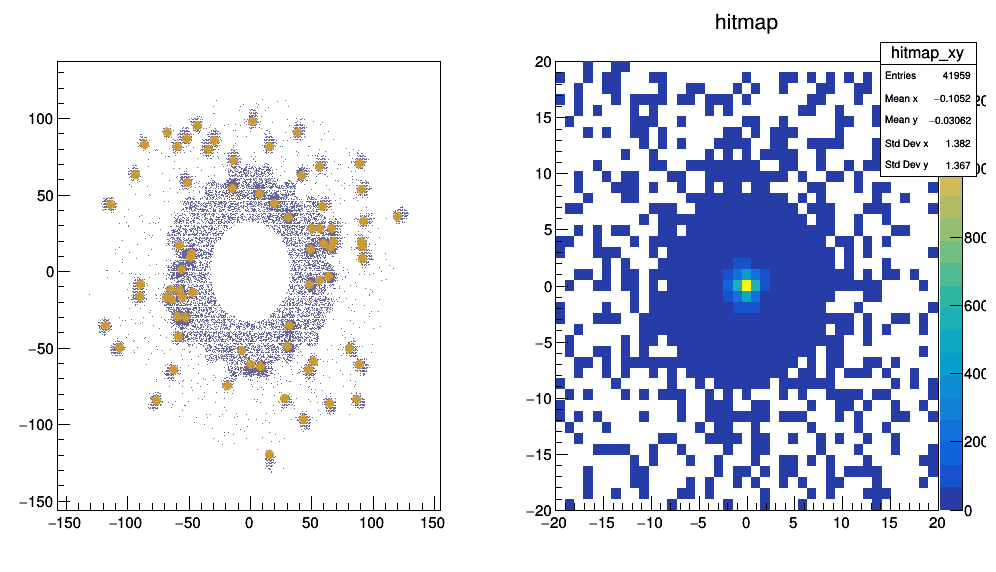

In [3]:
events = np.load(fname)

gr_part = ROOT.TGraph(); n_part = 0
gr_part.SetMarkerStyle(20)
gr_part.SetMarkerColor(ROOT.kOrange-5)

gr_hits = ROOT.TGraph(); n_hits = 0
#gr_hits.SetMarkerStyle(7)
gr_hits.SetMarkerColor(ROOT.kBlue-5)

hitmap = ROOT.TH2F("hitmap_xy","hitmap",41,-20,20,41,-20,20)
#hitmap = ROOT.TH2F("hitmap_etaphi","hitmap",41,-2,2,41,-2,2)

for i_ev, event in enumerate(events[:100]):

    particles = event[0]
    hits = event[1]
    #print particle, hits

    if len(particles) > 1: continue

    for particle in particles:
        gr_part.SetPoint(n_part, particle[0],particle[1])
        #gr_part.SetPoint(n_part, 0, 0)
        n_part += 1

    for hit in hits:
        gr_hits.SetPoint(n_hits, hit[0], hit[1])
        #gr_hits.SetPoint(n_hits, particle[0] - hit[0], particle[1] - hit[1])
        n_hits += 1

        #hitmap.Fill(particle[0] - hit[0], particle[1] - hit[1])
        # energy weighted
        hitmap.Fill(particle[0] - hit[0], particle[1] - hit[1], hit[3])

if n_part > 0:
    print("Got %i particles, %i hits" %(n_part, n_hits) )

    canv = ROOT.TCanvas("hits","Hits",1000,600)
    canv.Divide(2,1)

    canv.cd(1)
    #gr_part.Draw("ap")
    gr_hits.Draw("ap")
    #gr_hits.Draw("p same")
    gr_part.Draw("p same")

    canv.cd(2)
    hitmap.Draw("colz")

    canv.Draw()
    canv.Update()

Got 72 particles, 41959 hits


Warning in <TCanvas::Constructor>: Deleting canvas with same name: hits3d


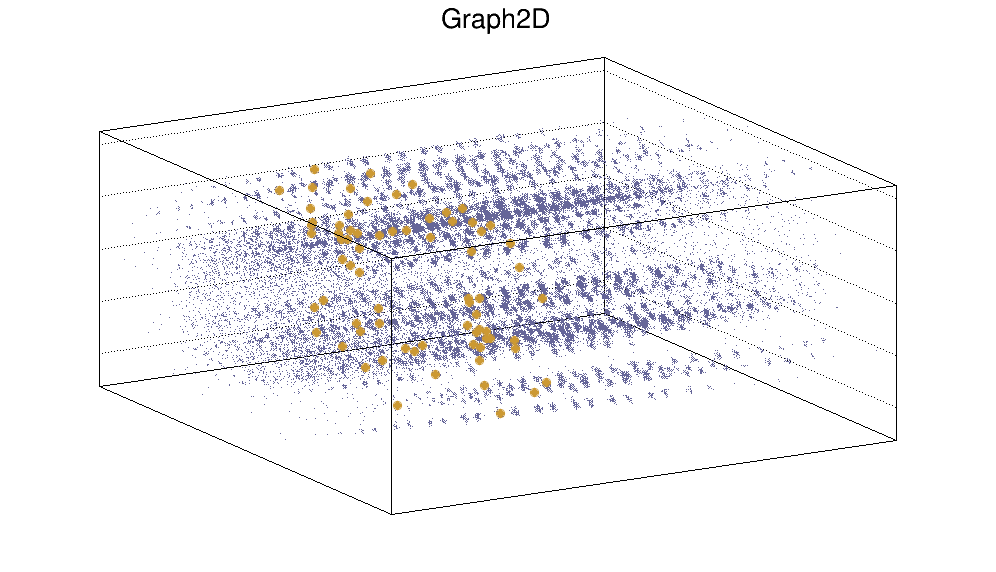

In [6]:
gr_part = ROOT.TGraph2D(); n_part = 0
gr_part.SetMarkerStyle(20)
gr_part.SetMarkerColor(ROOT.kOrange-5)

gr_hits = ROOT.TGraph2D(); n_hits = 0
#gr_hits.SetMarkerStyle(7)
gr_hits.SetMarkerColor(ROOT.kBlue-5)

for i_ev, event in enumerate(events[:100]):

    particles = event[0]
    hits = event[1]
    #print particle, hits

    if len(particles) > 1: continue

    for particle in particles:
        gr_part.SetPoint(n_part, particle[2], particle[0], particle[1])
        n_part += 1

    for hit in hits:
        gr_hits.SetPoint(n_hits, hit[2], hit[0], hit[1])
        n_hits += 1

if n_part > 0:
    print("Got %i particles, %i hits" %(n_part, n_hits) )

    canv = ROOT.TCanvas("hits3d","Hits",1000,600)
    gr_hits.Draw("ap")
    gr_part.Draw("p same")


    canv.Draw()
    canv.Update()

In [7]:
ROOT.enableJSVis()

canv.Draw()